# Exploratory data analysis

In this notebook, we will illustrate exploratory data analysis briefly based on the titanic dataset.

In [1]:
import numpy as np
import pandas as pd

Before we get set Exploratory data analysis, we will briefly look at some basic Matplotlib plotting.

## Basic matplotlib

In [2]:
# Importing the ploting module from matplotlib
from matplotlib import pyplot as plt

pyplot maintains an internal state with your plot that can be shown using `show` or saved using `savefig`

In [3]:
# Some sample data to be plottet
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

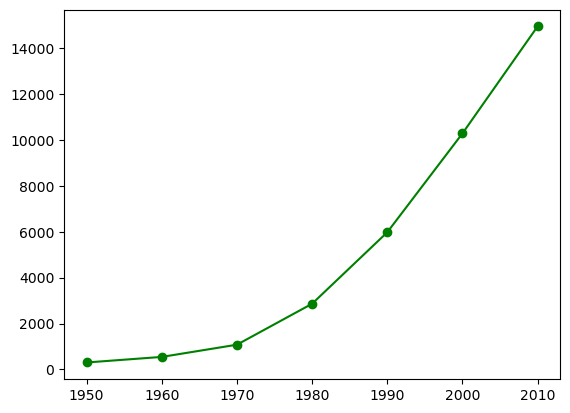

In [4]:
# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.show()

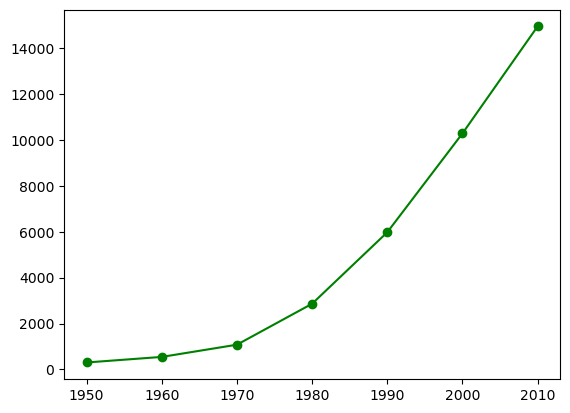

In [5]:
# Actually we do not need the show to see a single plot, but we get rid of output we do not need
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

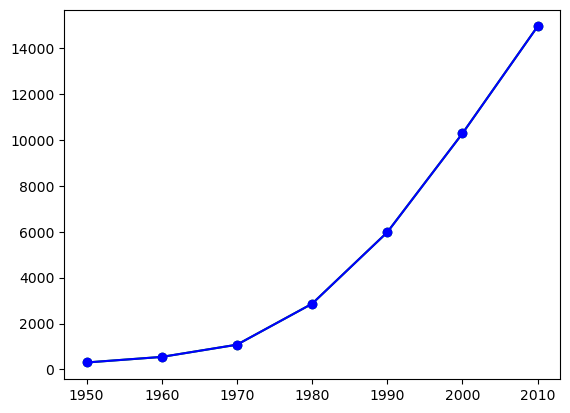

In [6]:
# However, using show also allow us to have multiple plots i the same cell
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.plot(years, gdp, color='blue', marker='o', linestyle='solid')

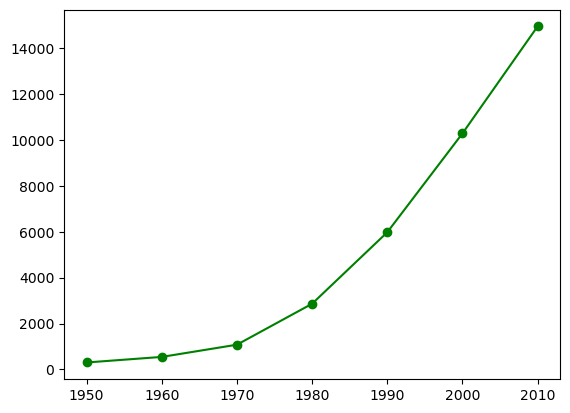

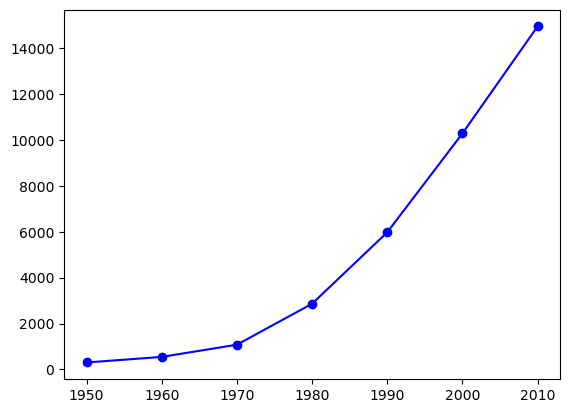

In [7]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.show()
plt.plot(years, gdp, color='blue', marker='o', linestyle='solid')
plt.show()

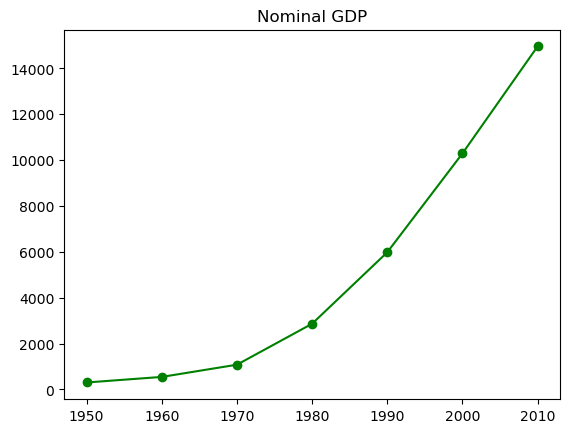

In [8]:
# Adding a title
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.show()

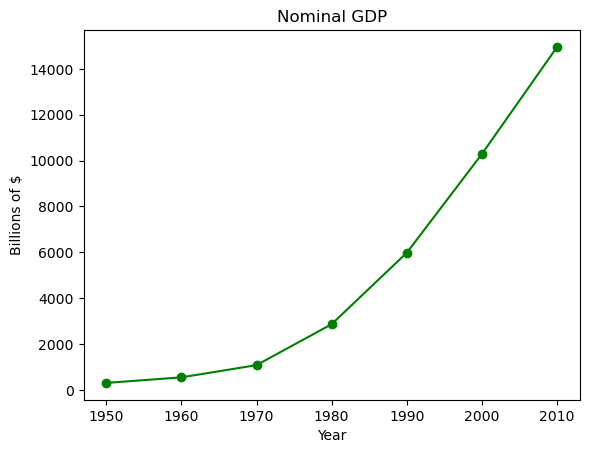

In [9]:
# Add a label to the x- and y-axis
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")
plt.show()

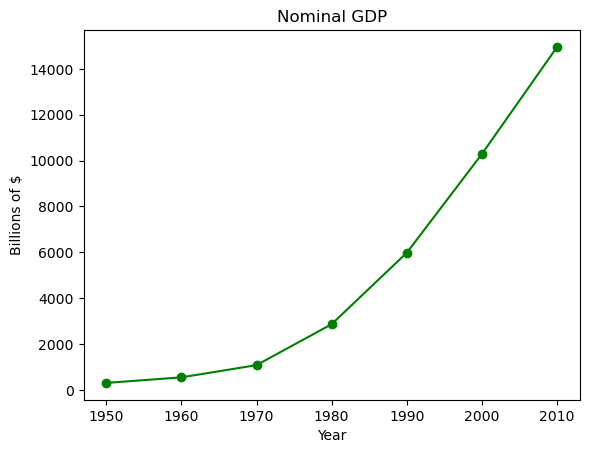

In [10]:
# Saving the plot
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")
plt.savefig('img/viz_gdp.png')  # NOTE: Only work if you already have a sublibrary that is called "img"

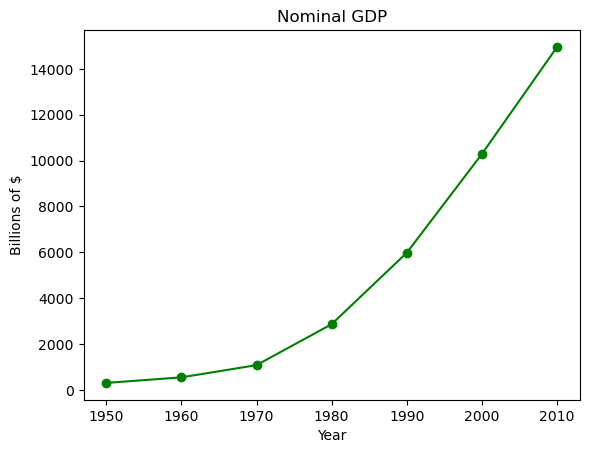

In [11]:
# Or in a higher resolution
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")
plt.savefig('img/viz_gdp_high_res.png', dpi=600)

### Multiple plots

Plots in matplotlib reside in figures that can contain one or more subplots referred to as axes. We can set up such subplots in multiple ways (see [Python for Data Analysis, 3E](https://wesmckinney.com/book/) chapter 9), but here is one way:

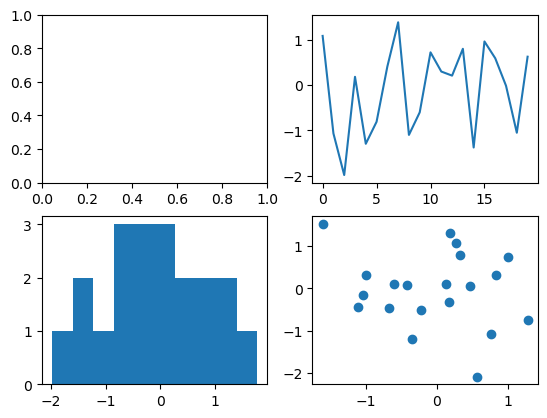

In [12]:
fig, axes = plt.subplots(2, 2)

axes[0,1].plot(np.random.standard_normal(20))
axes[1,0].hist(np.random.standard_normal(20))
axes[1,1].scatter(np.random.standard_normal(20), np.random.standard_normal(20))

### Chaning diplayed plot size in jupyter notebooks

When not zoomed in as here, the plot might look at bit small, so we can adjust their size throughout a notebook with the following command:

In [13]:
plt.rc("figure", figsize=(10, 7)) # 10 is width and 7 is hight

Text(0, 0.5, 'Billions of $')

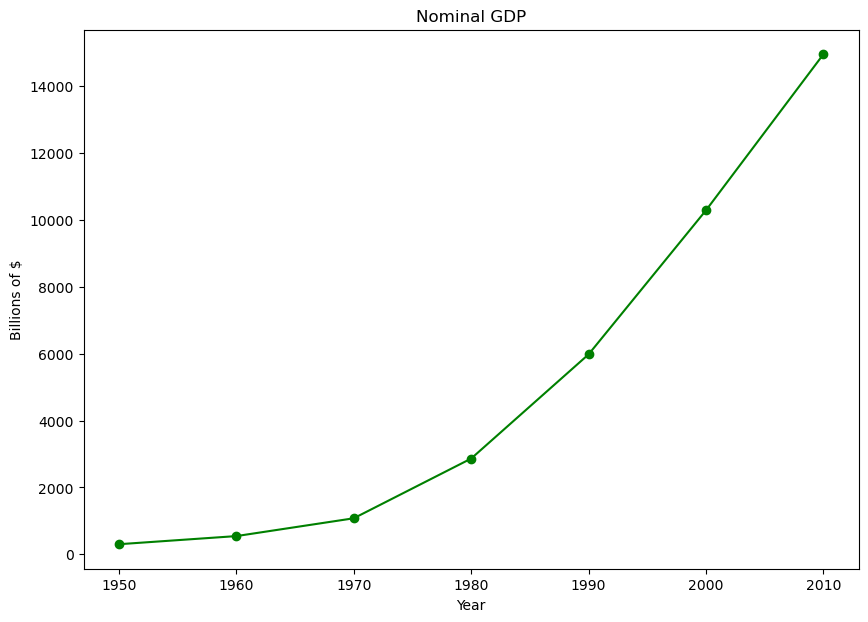

In [14]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.xlabel("Year")
plt.ylabel("Billions of $")

We can essentially do all the plots we want with Matplotlib, however, the syntax is not really easy for the types of plot we want to do, so intead we will use Seaborn that builds on top of Matplotlib.

## Initial step

Let us now do the first step of EDA, namely finding out which variables we have, what they mean and what their data type is.

First we need to load the data, of course.

In [15]:
titanic_data = pd.read_csv("titanic_survival_data.csv")

In [16]:
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.000,S
887,1,1,female,19.0,0,0,30.000,S
888,0,3,female,NaN,1,2,23.450,S
889,1,1,male,26.0,0,0,30.000,C


In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      868 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


(There are a few missing values in `Age`, `fare`, and `Embarked`. We will not deal with those here, as we already talked about missing values.)

## Variation within a variable

As examples, we will look at the numeric variable `Fare` and the categorical variable `Pclass` (passenger class).

### Visualization of variation within a variable

As previously mentioned, we will use Seaborn for plotting, mainly. So let us import it first.

In [18]:
import seaborn as sns

The variation within the variable `Pclass` is best illustrated through a bar plot (in Seaborn called a countplot):

<Axes: xlabel='Pclass', ylabel='count'>

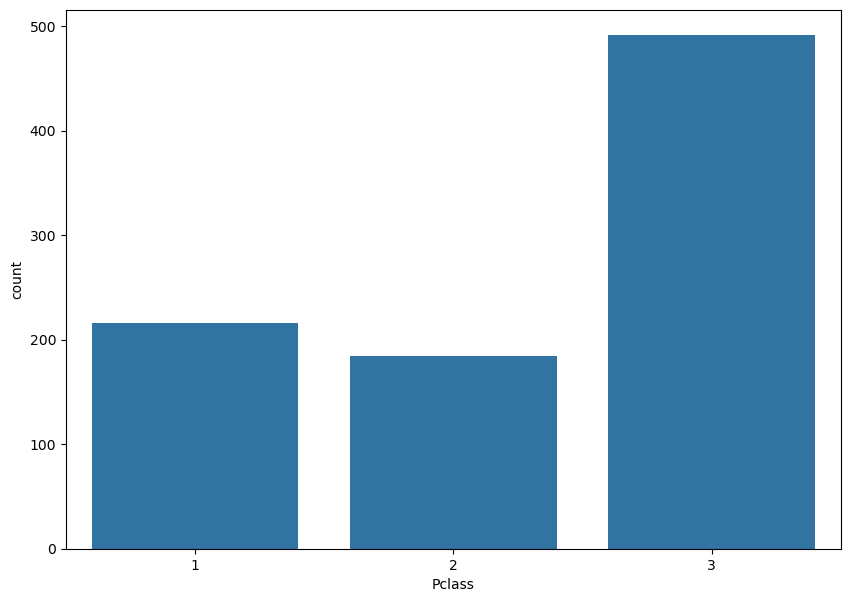

In [19]:
sns.countplot(x = "Pclass", data = titanic_data)

We can make it a bit nicer looking by using Matplotlib functionality to add title and axis labels - "Always label your Axes!"

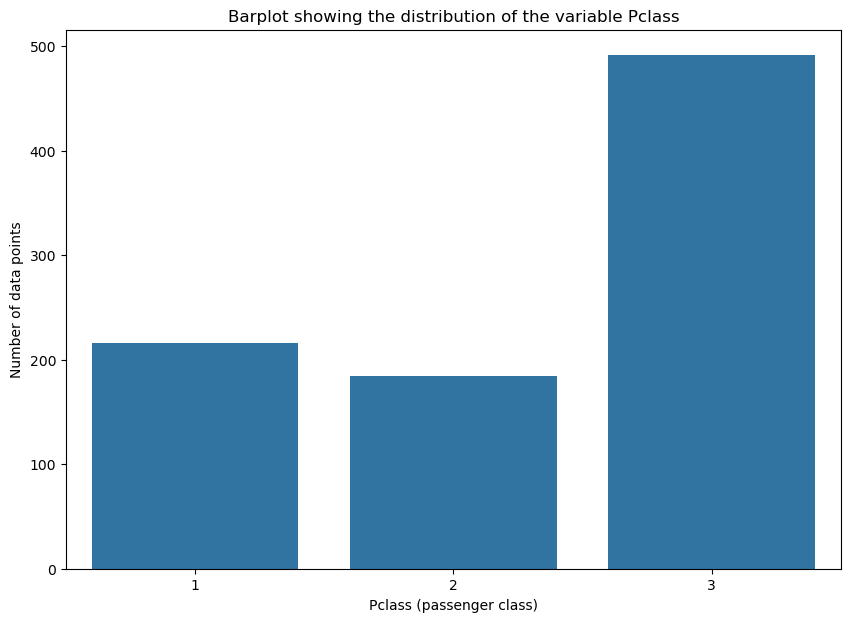

In [20]:
sns.countplot(x = "Pclass", data = titanic_data)
plt.title("Barplot showing the distribution of the variable Pclass")
plt.xlabel("Pclass (passenger class)")
plt.ylabel("Number of data points")
plt.show()

The variation of the numerical variable `Fare` can be visualized by a histogram:

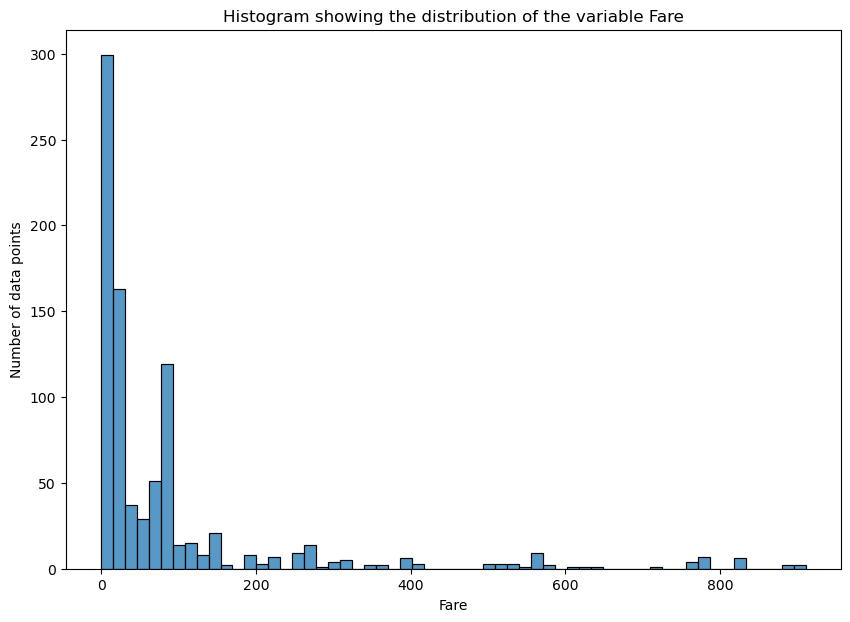

In [21]:
sns.histplot(data = titanic_data, x = "Fare")
plt.title("Histogram showing the distribution of the variable Fare")
plt.xlabel("Fare")
plt.ylabel("Number of data points")
plt.show()

If we think the automatic number of bars are not as we desire, we can easly change it by changing the number of bars or bins:

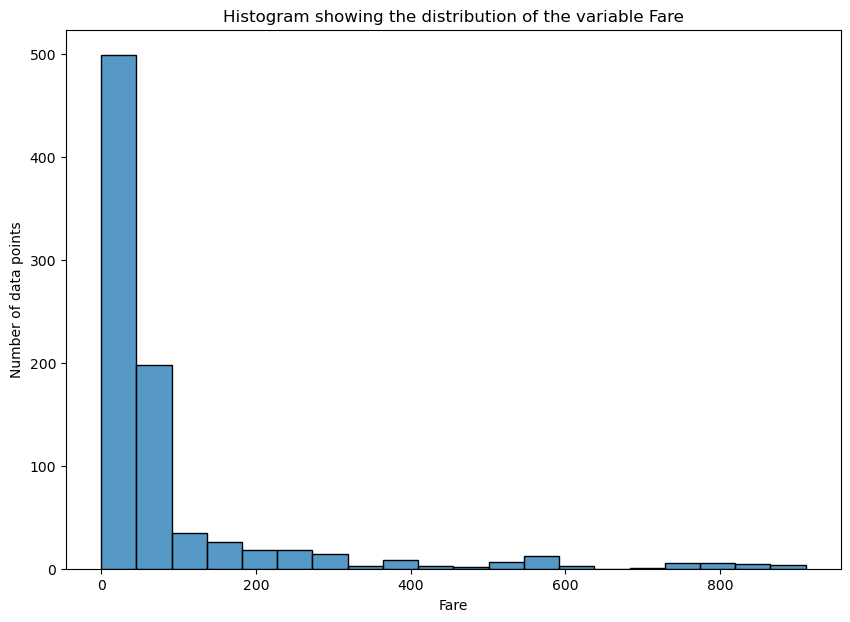

In [22]:
sns.histplot(data = titanic_data, x = "Fare", bins = 20)
plt.title("Histogram showing the distribution of the variable Fare")
plt.xlabel("Fare")
plt.ylabel("Number of data points")
plt.show()

We can easily change the color of the bars too, if we want:

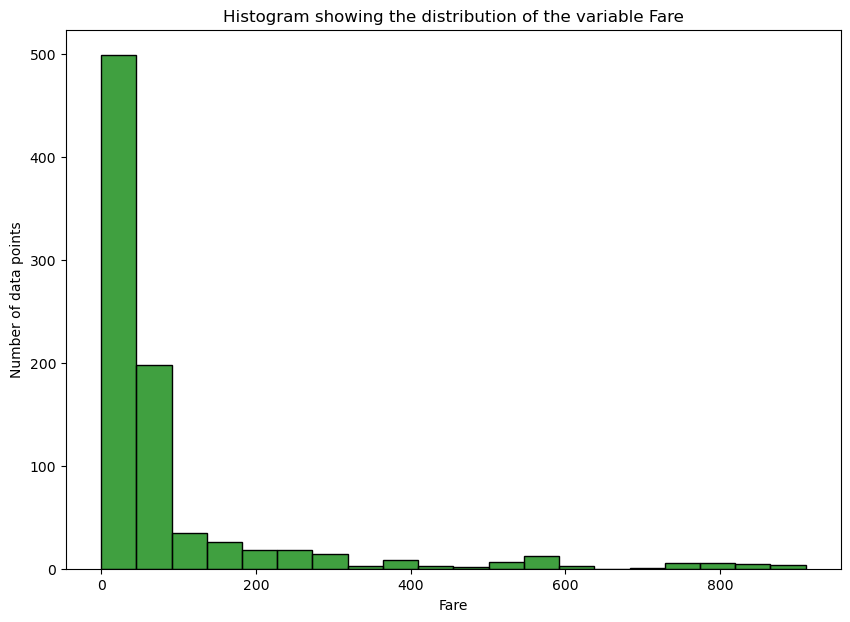

In [23]:
sns.histplot(data = titanic_data, x = "Fare", bins = 20, color= "green")
plt.title("Histogram showing the distribution of the variable Fare")
plt.xlabel("Fare")
plt.ylabel("Number of data points")
plt.show()

The distribution of the variable `Fare` can also be visualized through a boxplot:

<Axes: xlabel='Fare'>

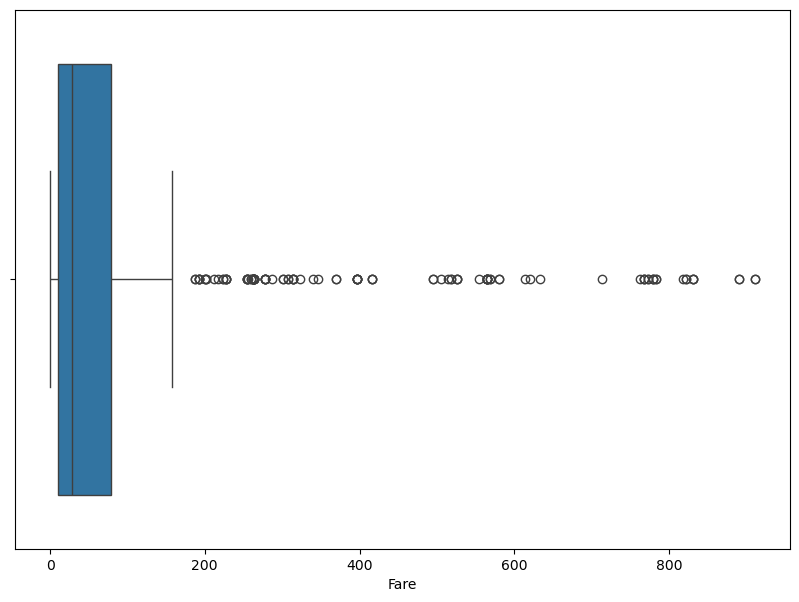

In [24]:
sns.boxplot(data = titanic_data, x = "Fare")

We can also add the mean of the `Fare` variable to the plot:

<Axes: xlabel='Fare'>

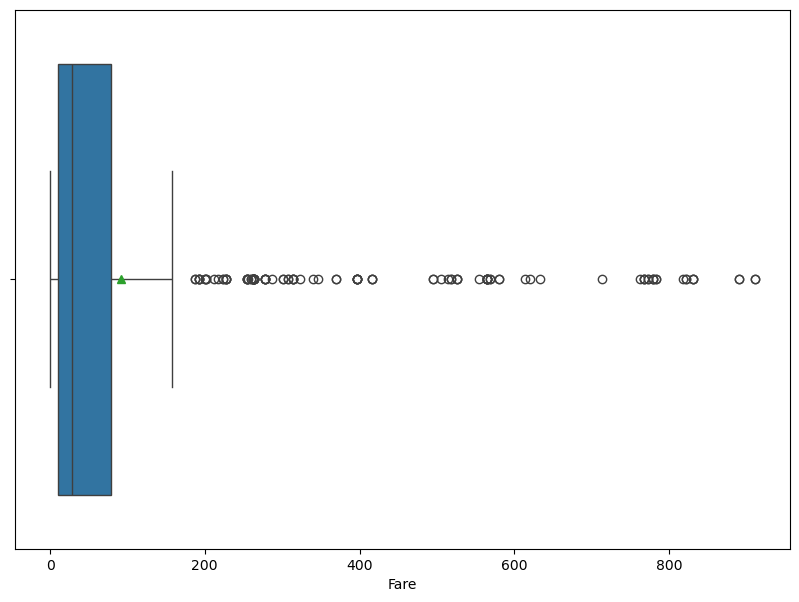

In [25]:
sns.boxplot(data = titanic_data, x = "Fare", 
            showmeans=True)

It might be a bit hard to see and not completely as we want it. However, we can easily change that as well:

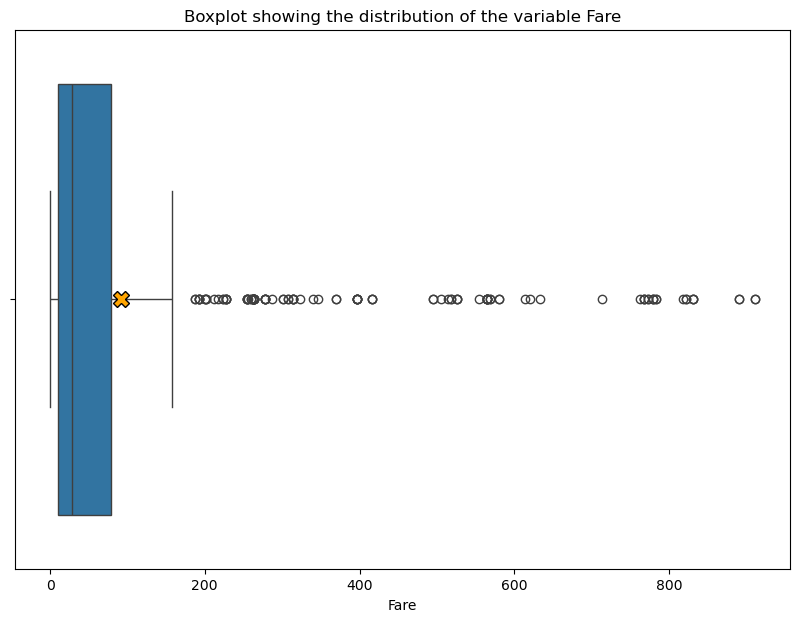

In [26]:
sns.boxplot(data = titanic_data, x = "Fare",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"orange", "markeredgecolor":"black", "markersize": "12"})
plt.title("Boxplot showing the distribution of the variable Fare")
plt.xlabel("Fare")
plt.ylabel(None)
plt.show()

We can change the direction of the box, by using `y` instead of `x` as argument:

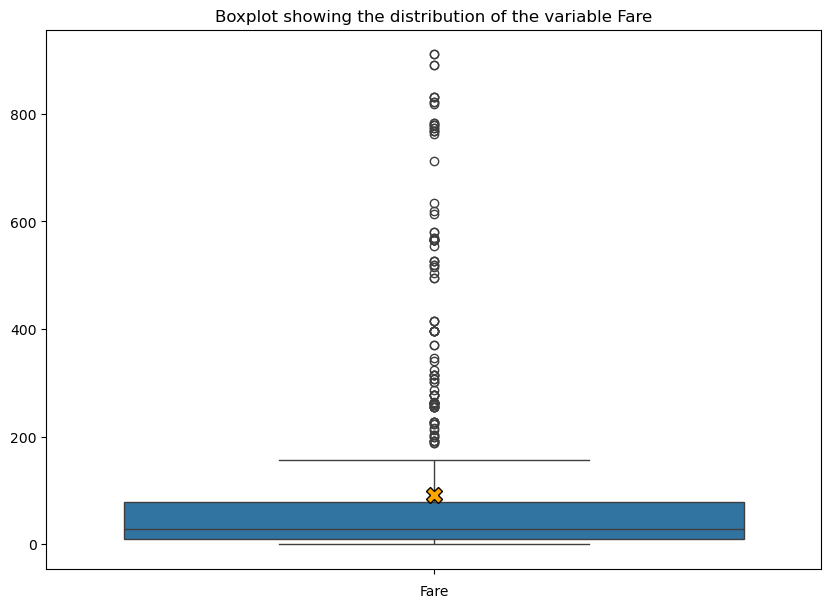

In [27]:
sns.boxplot(data = titanic_data, y = "Fare",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"orange", "markeredgecolor":"black", "markersize": "12"})
plt.title("Boxplot showing the distribution of the variable Fare")
plt.xlabel("Fare")
plt.ylabel(None)
plt.show()

### Quantification of variation within a variable

For the categorical variable `Pclass`, quantifying the variation of it just amoun to couting how many of each category occurs in the dataset. This is easily achied using `value_counts`.

In [28]:
titanic_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

For the numeric variable `Fare` there several descriptive statistics we might want to calculate. The `describe` method give us most of them:

In [29]:
titanic_data[["Fare"]].describe()

,Fare
count,868.000000
mean,91.288425
std,159.991488
min,0.000000
25%,10.500000
50%,27.825000
75%,78.958000
max,910.792000


Clearly the distribution is very right-skewed as the mean is much larger than the median.

## Variation between two variables

There are three cases: both variables are categorical, one variable is numeric and one is categorical, and both variables are numeric. We go through each of these cases separately.

### Variation between two categorical variables

For this case, we look at the variables `Pclass` and `Survived`.

To visualize the relationship between two categorical variables, we use the mosaic plot from the statsmodels package:

In [30]:
from statsmodels.graphics.mosaicplot import mosaic

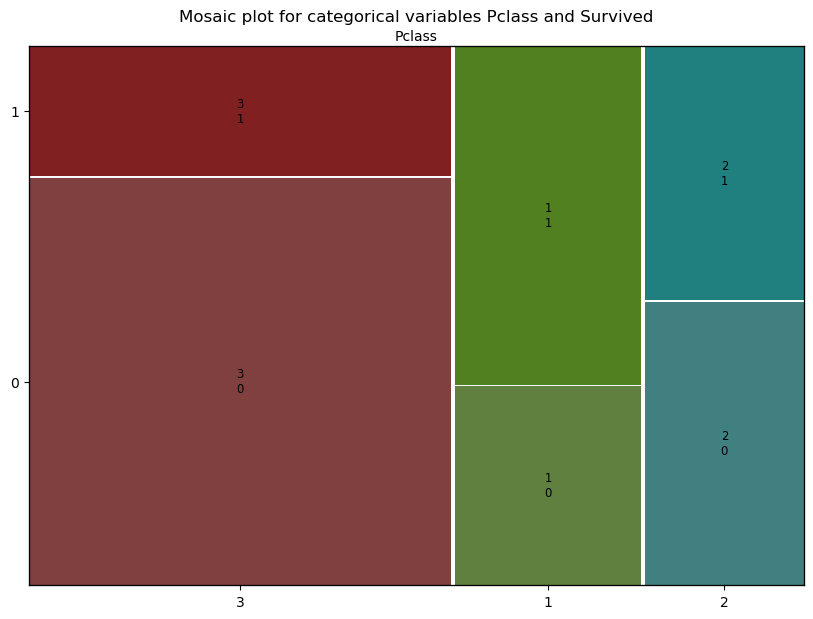

In [31]:
mosaic(titanic_data, ["Pclass", "Survived"])
plt.title("Mosaic plot for categorical variables Pclass and Survived")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show()

For the descriptive statistics we can do a cross table using pandas:

In [32]:
pd.crosstab(titanic_data["Pclass"], titanic_data["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### Variation between a numeric and a categorical variabel

For this case we look at the variable `Fare` and `Pclass`.

For visualizing the variation between the two variables, we do boxplots, where we both use `x` and `y`:

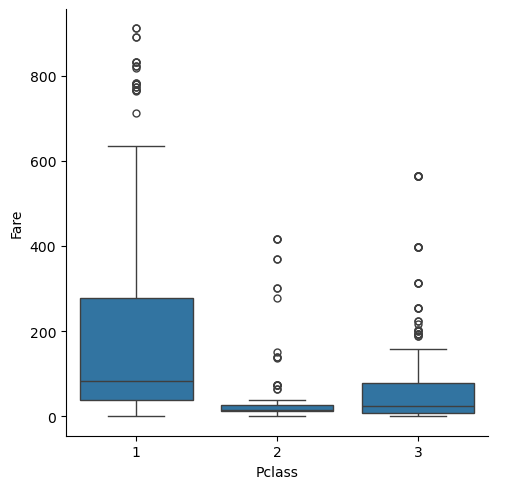

In [33]:
sns.catplot(x="Pclass", y = "Fare", data = titanic_data, kind="box")

We can use another argument `hue` to color the different bars differently. `hue` is useful for many other things, we will see later.

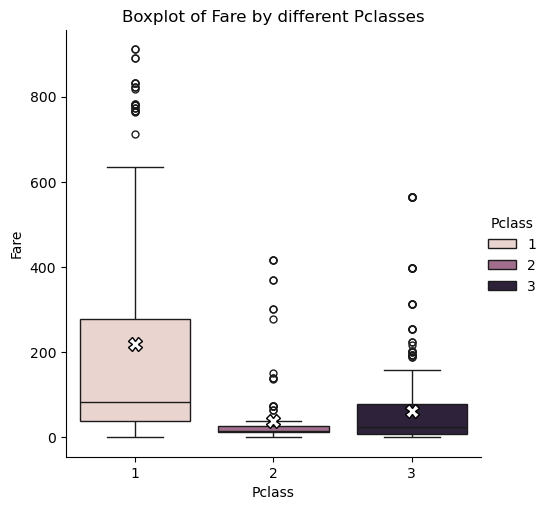

In [34]:
sns.catplot(x="Pclass", y = "Fare", hue = "Pclass", data = titanic_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.title("Boxplot of Fare by different Pclasses")
plt.show()

For descriptive statistics, we just calculate the same as for the variable `Fare`, but grouped by the `Pclass`variable.

In [35]:
FarebyPclass = titanic_data["Fare"].groupby(titanic_data["Pclass"]).describe()
FarebyPclass

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,193.0,219.548497,260.651629,0.0,38.500,83.475,277.208,910.792
2,184.0,37.447511,72.897002,0.0,13.000,15.025,26.000,415.792
3,491.0,61.049187,90.561775,0.0,7.925,23.250,78.958,564.958


### Variation between two numeric variables

For this case, we look at the variables `Fare` and `Age`.

For visualizing the variation between the two numeric variables, we do a scatterplot.

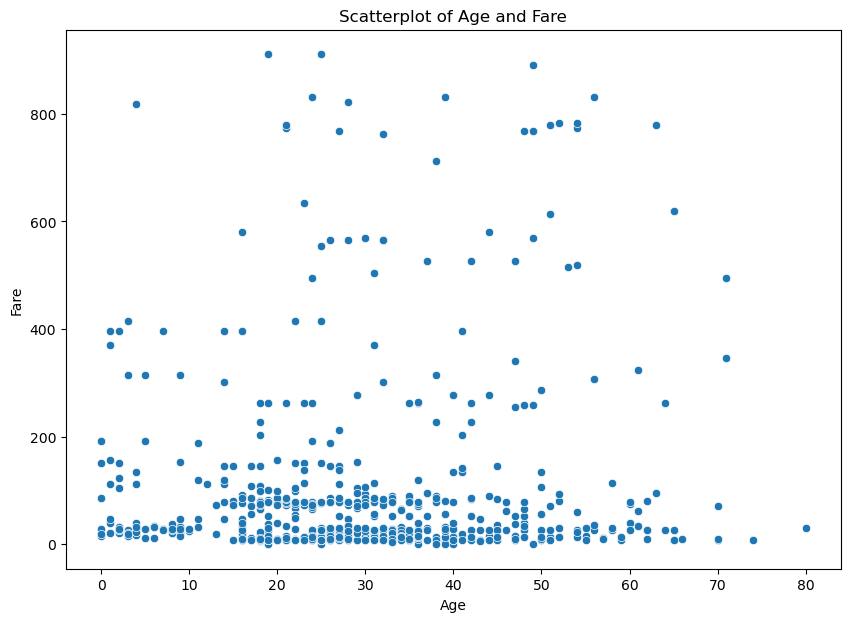

In [36]:
sns.scatterplot(data = titanic_data, x = "Age", y = "Fare")
plt.title("Scatterplot of Age and Fare")
plt.show()

Or with the regression line (more about this when we talk about regression in a few classes from now)

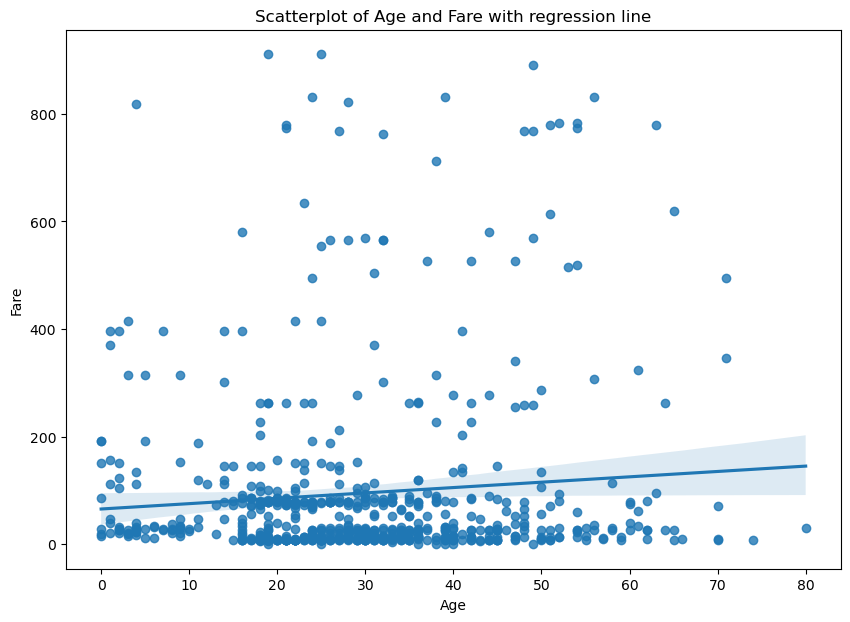

In [37]:
sns.regplot(x = "Age", y = "Fare", data = titanic_data)
plt.title("Scatterplot of Age and Fare with regression line")
plt.show()

We can also get all scatterplots among variables of a dataframe in one go, which will allow us to easily spot potential correlations.

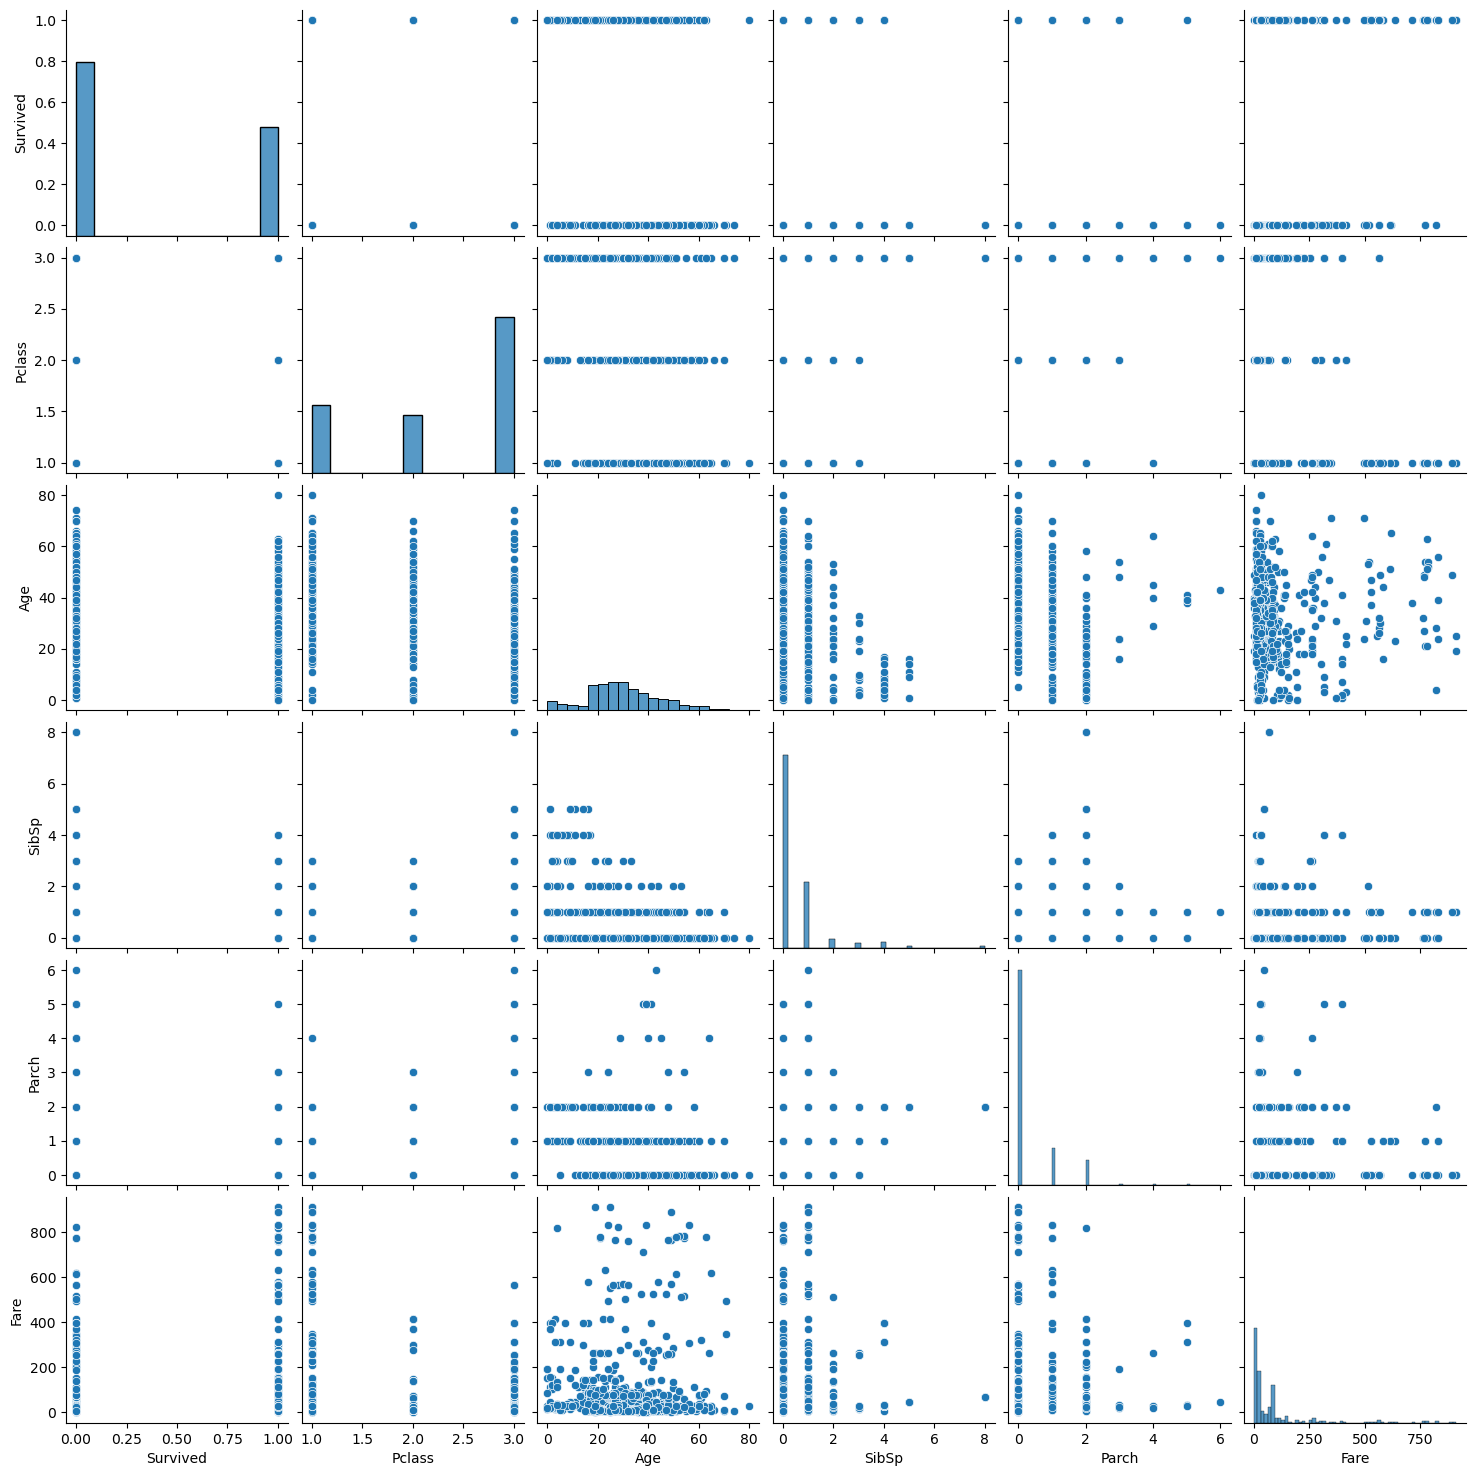

In [38]:
sns.pairplot(data = titanic_data)

Note how the categorical variables are here treated as numeric, which is due to them being encoded by numbers!

To calculate the relevant statistics, we calculate the correlation between the two variables.

In [39]:
# In pandas (dropping missing values implicitly?!)
titanic_data["Age"].corr(titanic_data["Fare"])

np.float64(0.08717792871017918)

In [40]:
# In Scipy
from scipy.stats import pearsonr
pearsonr(titanic_data["Age"], titanic_data["Fare"])

PearsonRResult(statistic=np.float64(nan), pvalue=np.float64(nan))

We need to remove the missing values for SciPy to make the proper calculation.

In [41]:
titanic_data_nonan = titanic_data[["Age", "Fare"]].dropna()

In [42]:
titanic_data_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 694 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     694 non-null    float64
 1   Fare    694 non-null    float64
dtypes: float64(2)
memory usage: 16.3 KB


In [43]:
# In Scipy
pearsonr(titanic_data_nonan["Age"], titanic_data_nonan["Fare"])

PearsonRResult(statistic=np.float64(0.08717792871017913), pvalue=np.float64(0.021627948368120042))

Note that we got the exact same value as when using pandas. Thus, pandas also seems to be removing all missing values, which make sense. (The pvalue, we will talk much more about next time...)

We will talk a bit more about correlation next time, and also we p-value we got along with `Scipy`.

### Multiple plots based on a variable

We can also look at more than two variables at a time by using various plotting techniques such as *facets* and *hue*.

We can arrange multiple plots in a grid based on other variables along the rows and columns. It can be highly useful to visualize more complex relationships among multiple variables.

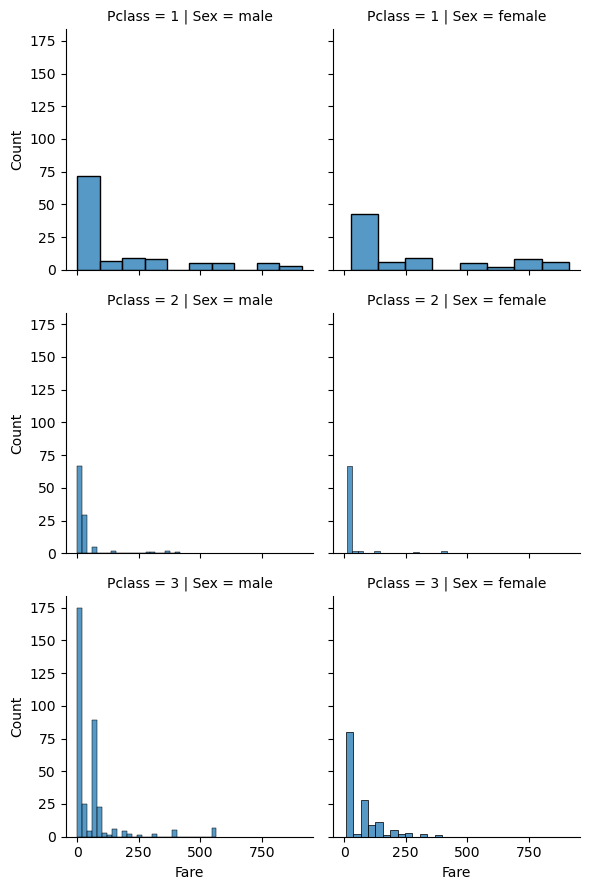

In [44]:
g=sns.FacetGrid(titanic_data, col="Sex", row="Pclass")
g.map(sns.histplot, "Fare")

We can also use the `hue` argument to draw multiple boxes in the same plot, for instance.

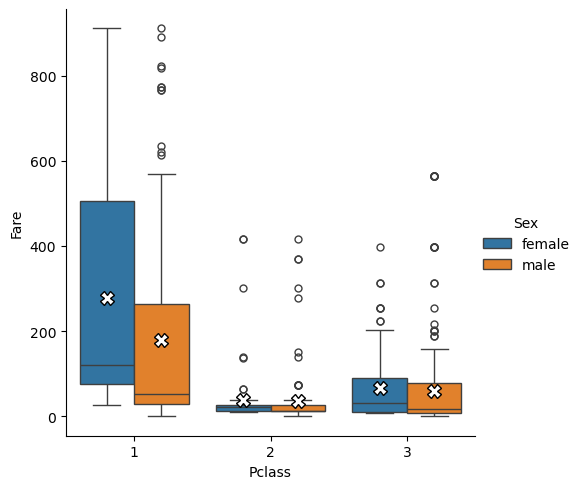

In [45]:
sns.catplot(x="Pclass", y = "Fare", hue = "Sex", data = titanic_data, kind="box",
            showmeans=True,
            meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})

There are endless posibilities of plotting with Seaborn. See the [package website](https://seaborn.pydata.org/index.html) for more.